# Edible Poisonous Mushroom Image Classifier

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import cv2
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


/Users/admin/Dropbox/Second Year/Software Engineering/Assessment/shrooming/shroomEPImages


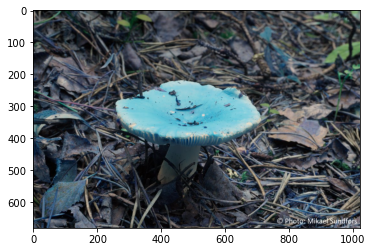

In [2]:
import pathlib
myFile = 'shroomEPImages'
data_dir = os.path.abspath("./" + myFile) 
print(data_dir)

categories = ['edible', 'poisonous']

for category in categories:
    path = os.path.join(data_dir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show
        break
    break
    print(img_array)

In [3]:
batch_size = 32
img_height = 180
img_width = 180

import pathlib
myFile = 'shroomEPImages'
data_dir = os.path.abspath("./" + myFile) # or similar, depending on your scenario

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 413 files belonging to 2 classes.
Using 331 files for training.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 413 files belonging to 2 classes.
Using 82 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['edible', 'poisonous']


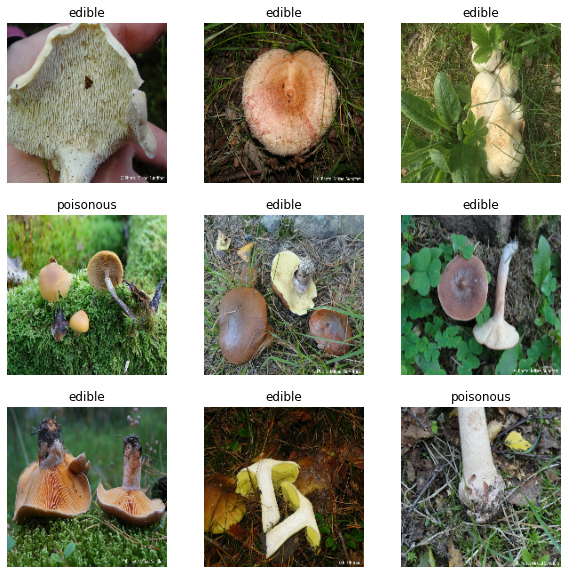

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


Creating the model:

In [8]:
num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

Compile the model:

Currently using adam optimiser

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [11]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
11/11 [==============================] - 13s 915ms/step - loss: 0.9136 - accuracy: 0.6286 - val_loss: 0.6266 - val_accuracy: 0.6707
Epoch 2/10
11/11 [==============================] - 10s 796ms/step - loss: 0.5822 - accuracy: 0.7073 - val_loss: 0.6172 - val_accuracy: 0.6707
Epoch 3/10
11/11 [==============================] - 10s 782ms/step - loss: 0.5415 - accuracy: 0.7121 - val_loss: 0.6130 - val_accuracy: 0.6707
Epoch 4/10
11/11 [==============================] - 11s 847ms/step - loss: 0.4844 - accuracy: 0.8045 - val_loss: 0.6944 - val_accuracy: 0.6829
Epoch 5/10
11/11 [==============================] - 13s 1s/step - loss: 0.4518 - accuracy: 0.7807 - val_loss: 0.6572 - val_accuracy: 0.6463
Epoch 6/10
11/11 [==============================] - 13s 959ms/step - loss: 0.3807 - accuracy: 0.8444 - val_loss: 0.7820 - val_accuracy: 0.6829
Epoch 7/10
11/11 [==============================] - 14s 1s/step - loss: 0.2681 - accuracy: 0.8778 - val_loss: 0.6722 - val_accuracy: 0.6341
Epoch

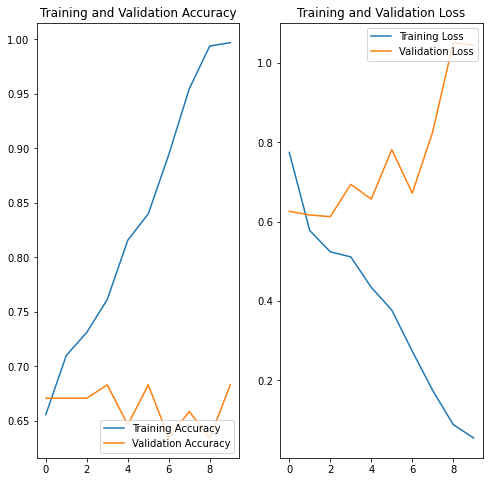

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

predict on new data:

In [13]:
mushroom_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRCNEyMK_tgLK3bF-zKcHG5loKontPWeNhLcA&usqp=CAU"
mushroom_path = tf.keras.utils.get_file('test_shroom', origin =mushroom_url)

img = keras.preprocessing.image.load_img(
    mushroom_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to poisonous with a 53.28 percent confidence.
